<a href="https://colab.research.google.com/github/mmsampath777/big-mart-sales-prediction/blob/main/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor #classifier
from sklearn import metrics #find the performance

2.Data Collection and analysis

In [8]:
#loading the dataset
big_mart = pd.read_csv("/content/Train.csv")


In [9]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Number of data points and number of features

In [6]:
big_mart.shape

(5681, 11)

Info about dataset

In [10]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Categorical Value**
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [12]:
#checking for missing values
big_mart.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Handling Missing values

- Mean(Imputation method) -> average value
- Mode -> Most repeated value used for categorical data  



In [17]:
#mean value of item weight column as it contains 1463 null value
mean_value = big_mart['Item_Weight'].mean()
print(mean_value)

12.857645184135976


Filling the missing values in item weight column with mean value


In [18]:
big_mart['Item_Weight'].fillna(mean_value,inplace=True)

Again checking dataset

In [19]:
#checking for missing values
big_mart.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Filling the missing values in Outlet_Size column with mode value

In [20]:
mode_of_outlet_size = big_mart.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x : x.mode()[0]))
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


Replacing the null values

In [23]:
missing_value = big_mart['Outlet_Size'].isnull()
print(missing_value)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [59]:
big_mart.loc[missing_value,'Outlet_Size'] = big_mart.loc[missing_value,'Outlet_Type'].apply(lambda x : mode_of_outlet_size[x])

Checking the Outlet_Size column

In [54]:
big_mart.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


Data analysis

In [27]:
#statistical data
big_mart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [28]:
sb.set() #assign a theme

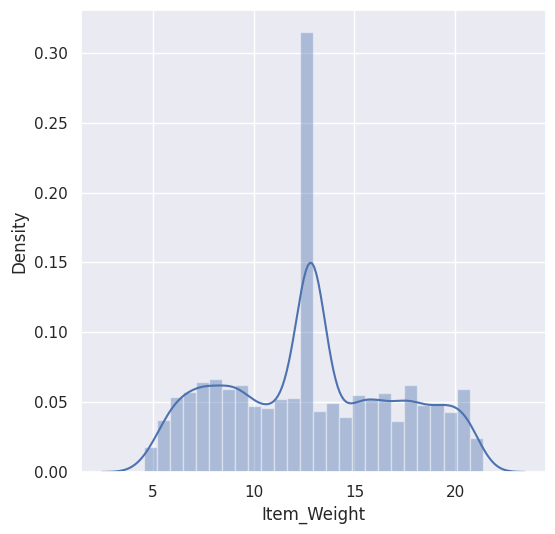

In [31]:
#Item Weight
plt.figure(figsize=(6,6))
sb.distplot(big_mart['Item_Weight'])
plt.show()


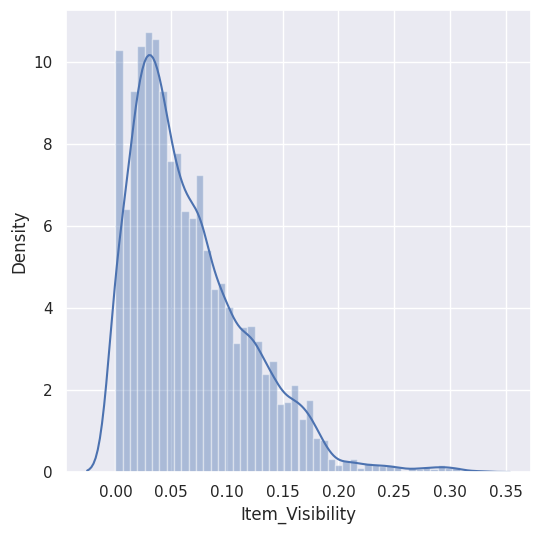

In [35]:
#Item Visibility
plt.figure(figsize=(6,6))
sb.distplot(big_mart['Item_Visibility'])
plt.show()

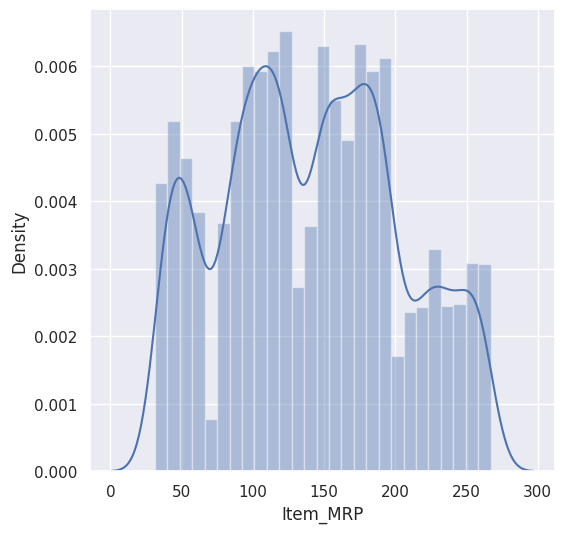

In [36]:
#Item MRP
plt.figure(figsize=(6,6))
sb.distplot(big_mart['Item_MRP'])
plt.show()

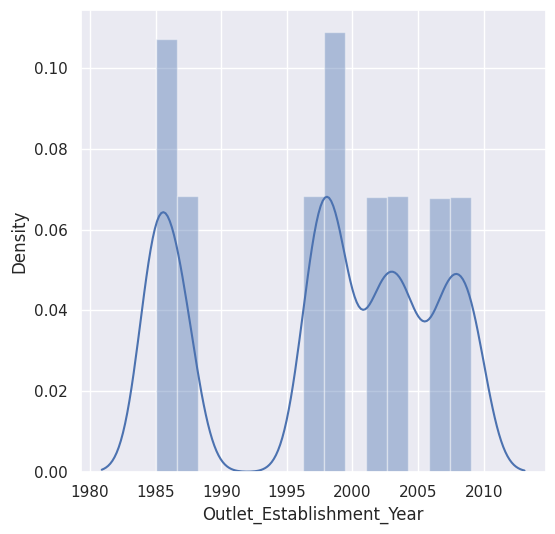

In [37]:
#Outlet_Establishment_Year
plt.figure(figsize =(6,6))
sb.distplot(big_mart['Outlet_Establishment_Year'])
plt.show()

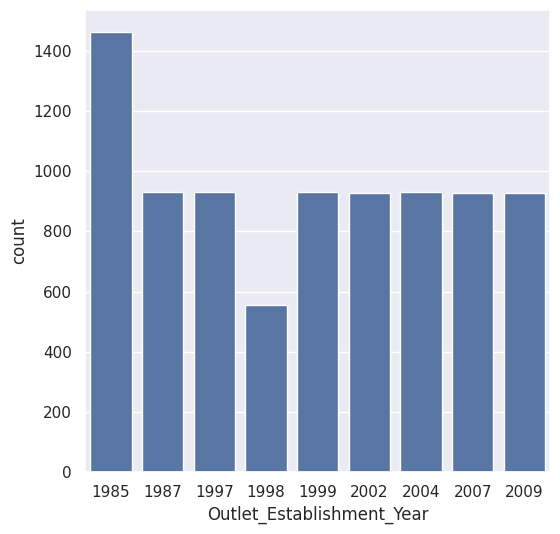

In [43]:

plt.figure(figsize=(6,6))
sb.countplot(x='Outlet_Establishment_Year',data=big_mart)
plt.show()

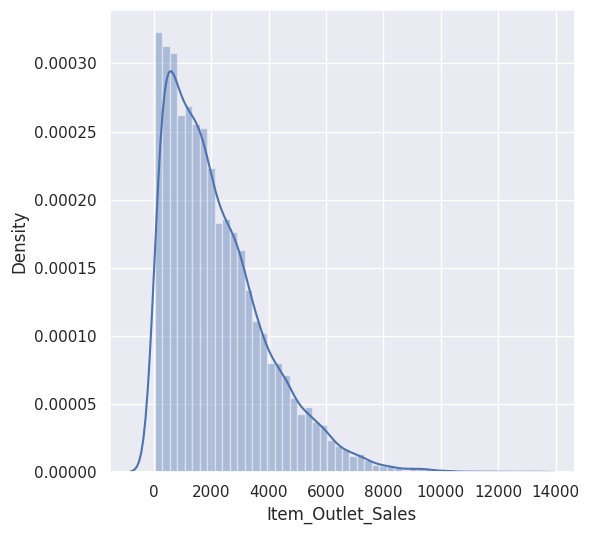

In [45]:
# Item_Outlet_Sales
plt.figure(figsize =(6,6))
sb.distplot(big_mart['Item_Outlet_Sales'])
plt.show()

Categorical Data

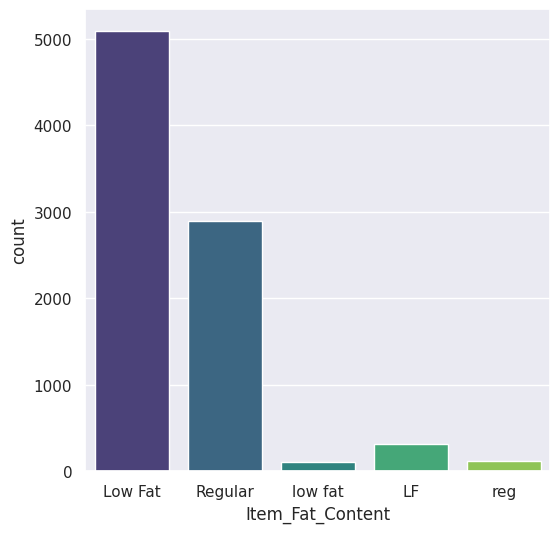

In [49]:
plt.figure(figsize= (6,6))
sb.countplot(x='Item_Fat_Content',data=big_mart,palette='viridis')
plt.show()

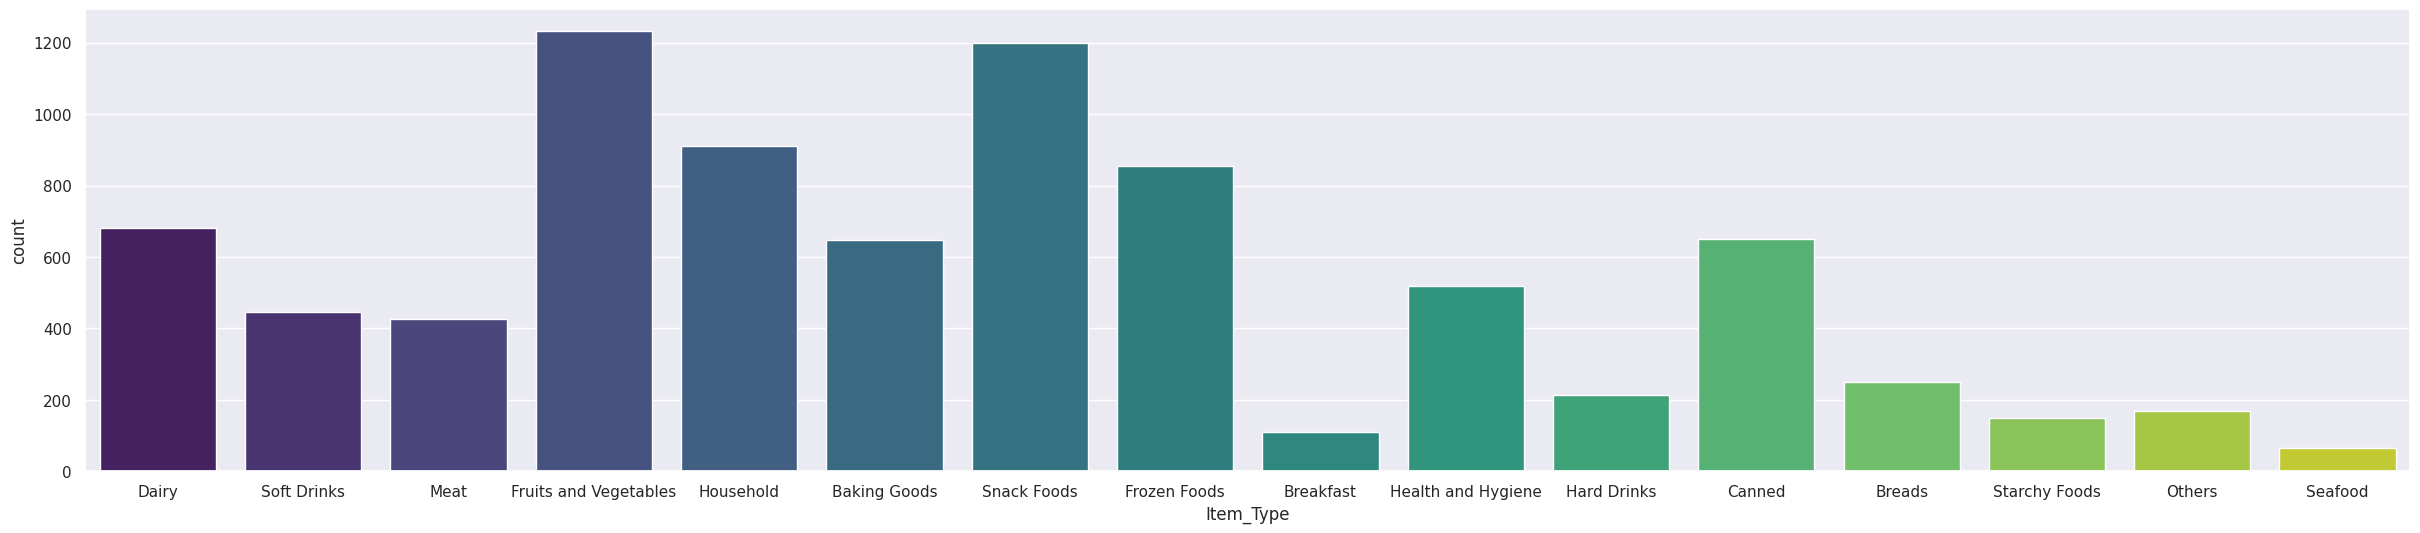

In [48]:
plt.figure(figsize= (30,6))
sb.countplot(x='Item_Type',data=big_mart, palette='viridis')
plt.show()

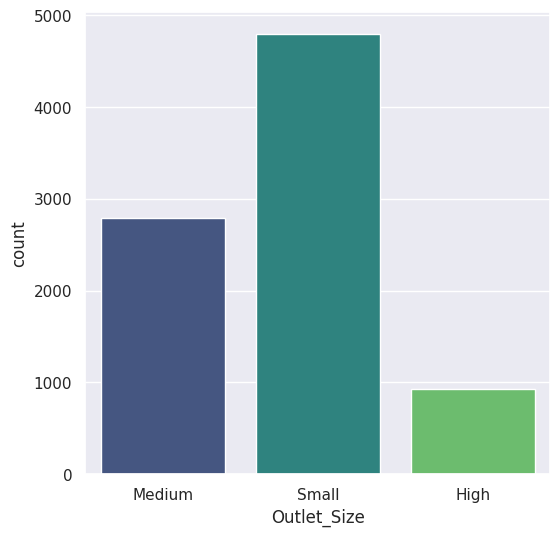

In [62]:
plt.figure(figsize= (6,6))
sb.countplot(x='Outlet_Size',data=big_mart,palette='viridis')
plt.show()

Data preprocessing

In [64]:
big_mart['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [65]:
big_mart.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [66]:
big_mart['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


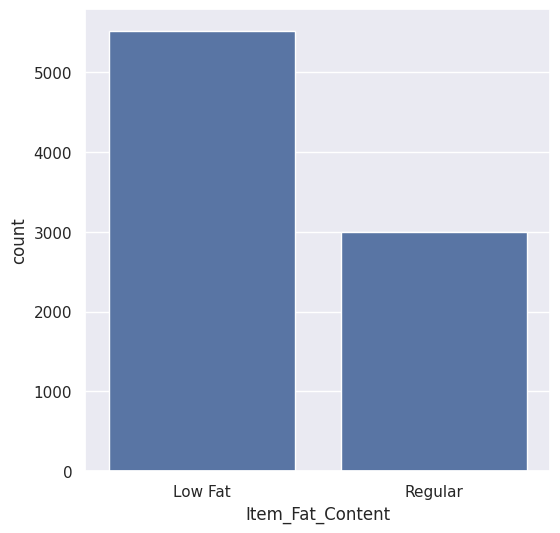

In [68]:
plt.figure(figsize=(6,6))
sb.countplot(x='Item_Fat_Content',data=big_mart)
plt.show()

Label Encoding

In [70]:
encoder = LabelEncoder()

In [74]:
big_mart['Item_Identifier'] = encoder.fit_transform(big_mart['Item_Identifier'])
big_mart['Item_Fat_Content'] = encoder.fit_transform(big_mart['Item_Fat_Content'])
big_mart['Item_Type'] = encoder.fit_transform(big_mart['Item_Type'])
big_mart['Outlet_Identifier'] = encoder.fit_transform(big_mart['Outlet_Identifier'])
big_mart['Outlet_Size'] = encoder.fit_transform(big_mart['Outlet_Size'])
big_mart['Outlet_Location_Type'] = encoder.fit_transform(big_mart['Outlet_Location_Type'])
big_mart['Outlet_Type'] = encoder.fit_transform(big_mart['Outlet_Type'])


In [75]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting Festures and Target

In [93]:
feature = big_mart.drop(columns='Item_Outlet_Sales',axis=1)
target = big_mart['Item_Outlet_Sales']
print(feature)
print(target)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                 156        9.300  ...                     0            1
1                   8        5.920  ...                     2            2
2                 662       17.500  ...                     0            1
3                1121       19.200  ...                     2            0
4                1297        8.930  ...                     2            1
...               ...          ...  ...                   ...          ...
8518              370        6.865  ...                     2            1
8519              897        8.380  ...                     1            1
8520             1357       10.600  ...                     1            1
8521              681        7.210  ...                     2            2
8522               50       14.800  ...                     0            1

[8523 rows x 11 columns]
0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4 

Splitting data into train and test data

In [101]:
feature_train,feature_test,target_train,target_test = train_test_split(feature,target,test_size=0.2,random_state=2)
print(feature.shape,feature_train.shape,feature_test.shape)

(8523, 11) (6818, 11) (1705, 11)


ML model training

In [80]:
regressor = XGBRegressor()

In [81]:
regressor.fit(feature_train,target_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation step

In [104]:
#prediction on training data
f_predict = regressor.predict(feature_train)



In [106]:
#R squared value
r2_train = metrics.r2_score(target_train,f_predict)

In [107]:
print("R squared value = ",r2_train)

R squared value =  0.5872420219076583


In [98]:
f_predict2 = regressor.predict(feature_test)

In [99]:
r2_test = metrics.r2_score(target_test,f_predict2)

In [103]:
print("R squared value = ",r2_test)

R squared value =  0.4554331713657317
